In [24]:
import pandas as pd #import tha pandas library,pd as a short name so we can write pd.read_csv instead of pandas.read_csv
import numpy as np #for mathematical operations
import matplotlib.pyplot as plt #for bar charts
import seaborn as sns #for attractive look for bar charts etc
#load the dataset
df=pd.read_csv("sample_data/NFLX_stocks.csv")
df.head() #will show first five row of data set for q quick look

,date,open,high,low,close,adj_close,volume
0,NaN,NFLX,NFLX,NFLX,NFLX,NFLX,NFLX
1,5/23/2002,1.156429052,1.242856979,1.145714045,1.196429014,1.196429014,104790000
2,5/24/2002,1.21428597,1.225000024,1.197142959,1.210000038,1.210000038,11104800
3,5/28/2002,1.213570952,1.232143044,1.157142997,1.157142997,1.157142997,6609400
4,5/29/2002,1.164286017,1.164286017,1.085713983,1.103571057,1.103571057,6757800


In [25]:
print(df.dtypes)
print(df.isnull().sum())

date         object
open         object
high         object
low          object
close        object
adj_close    object
volume       object
dtype: object
date         1
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64


OUTPUT SHOWS
All columns are still in object (text) format — even numeric ones like open, high, etc.

Only 1 missing value — and it's in the date column.

The rest of the data is clean — no missing values in open, close, volume, etc.



Clean and Convert Data Types

In [26]:
df=df[df['date'].notna()] # Remove the row with missing date
# List of columns to convert
columns_to_convert = ['open', 'high', 'low', 'close', 'adj_close', 'volume']

# Convert all to numeric format
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    # Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])
# Check final data types
print(df.dtypes)

# Check the first few rows again
df.head()

date         datetime64[ns]
open                float64
high                float64
low                 float64
close               float64
adj_close           float64
volume                int64
dtype: object


/tmp/ipython-input-26-599168443.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/tmp/ipython-input-26-599168443.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


,date,open,high,low,close,adj_close,volume
1,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
3,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
4,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
5,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


Explore the Dataset

In [27]:
df['date'].min(),df['date'].max()

(Timestamp('2002-05-23 00:00:00'), Timestamp('2025-06-12 00:00:00'))

 What does the data look like over time? (Line chart of closing price)

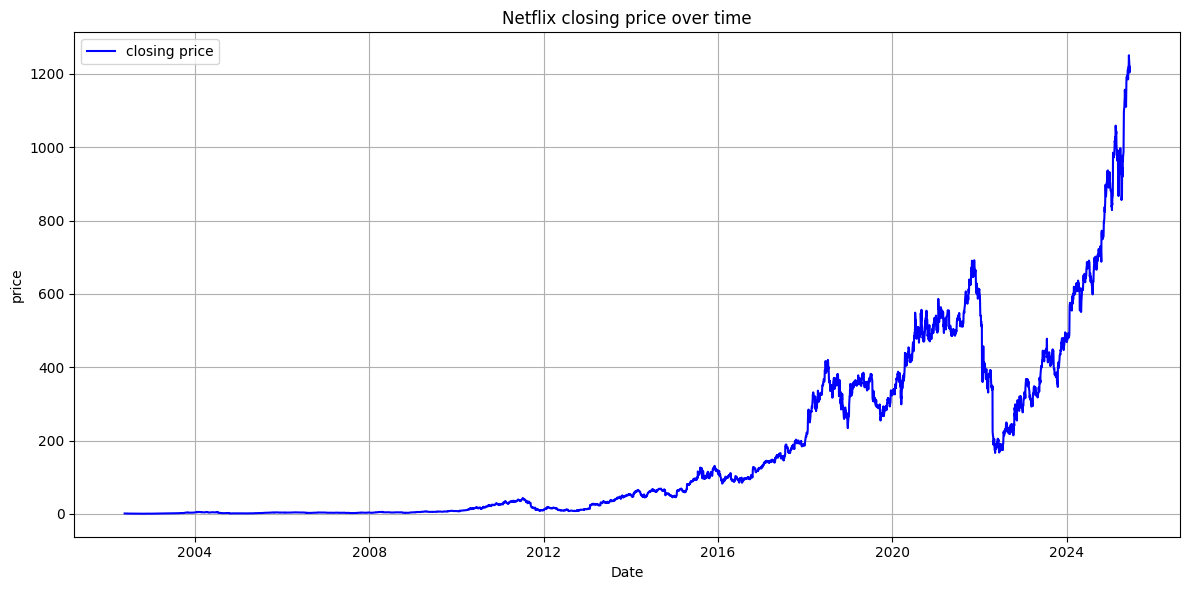

In [28]:
plt.figure(figsize=(12,6))
plt.plot(df['date'],df['close'],label='closing price',color='blue')
plt.title('Netflix closing price over time')
plt.xlabel('Date')
plt.ylabel('price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [29]:
df['close'].describe()


,close
count,5802.000000
mean,172.807773
std,234.885388
min,0.372857
25%,4.307143
50%,47.187143
75%,317.935005
max,1250.520020


In [30]:

df[df['close']==df['close'].max()]

,date,open,high,low,close,adj_close,volume
5797,2025-06-05,1240.599976,1262.810059,1237.290039,1250.52002,1250.52002,2817200


 Convert Columns to Proper Numeric Types because all columns is object types

In [31]:
df.dtypes



,0
date,datetime64[ns]
open,float64
high,float64
low,float64
close,float64
adj_close,float64
volume,int64


Compare Opening vs Closing Prices Over Time 📊

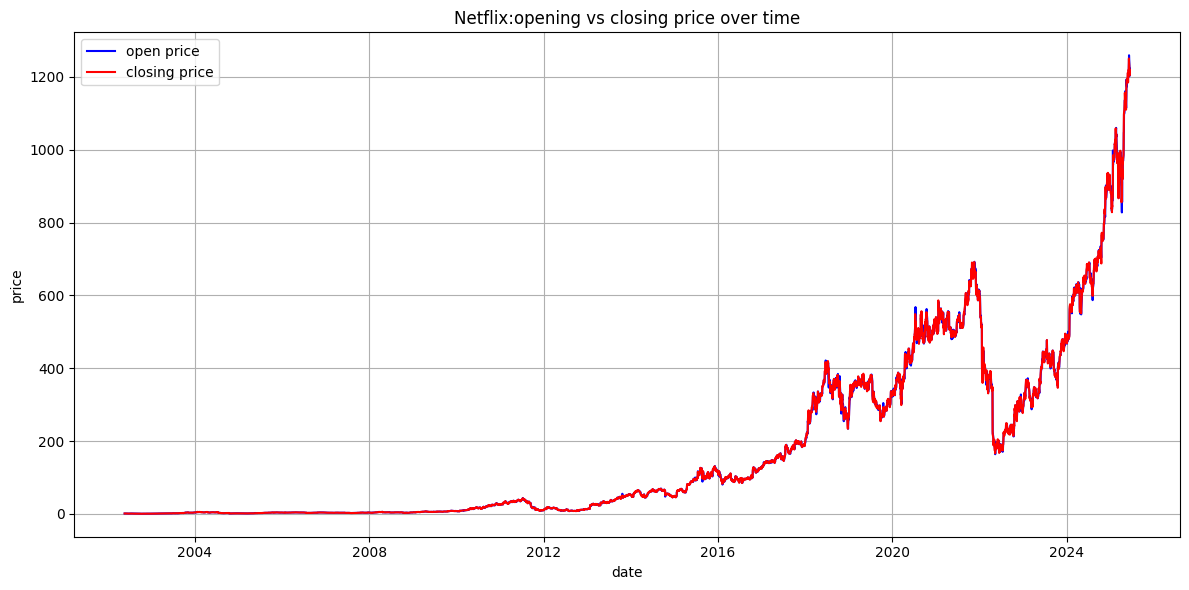

In [32]:
plt.figure(figsize=(12,6))
plt.plot(df['date'],df['open'],label='open price',color='blue')
plt.plot(df['date'],df['close'],label='closing price',color='red')
plt.title('Netflix:opening vs closing price over time')
plt.xlabel('date')
plt.ylabel('price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Find Yearly and Monthly Averages 📅

In [33]:
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
average_yearly_close=df.groupby('year')['close'].mean().reset_index()
print('average closing per year')
print(average_yearly_close)
average_monthly_close=df.groupby('month')['close'].mean().reset_index()
print('average closing per month')
print(average_monthly_close)


average closing per year
    year        close
0   2002     0.850172
1   2003     2.081205
2   2004     3.413430
3   2005     2.597262
4   2006     3.690996
5   2007     3.123933
6   2008     4.094670
7   2009     6.322035
8   2010    16.824172
9   2011    27.493719
10  2012    11.855057
11  2013    35.271831
12  2014    57.495119
13  2015    91.895674
14  2016   102.030357
15  2017   165.374263
16  2018   319.290319
17  2019   328.872380
18  2020   446.827233
19  2021   558.217697
20  2022   284.639244
21  2023   390.247880
22  2024   671.500238
23  2025  1020.479096
average closing per month
    month       close
0       1  177.725748
1       2  189.115526
2       3  182.630126
3       4  188.479099
4       5  191.535415
5       6  168.426108
6       7  157.625188
7       8  155.205479
8       9  157.316454
9      10  162.861043
10     11  171.317445
11     12  173.766923


YEARLY PLOT

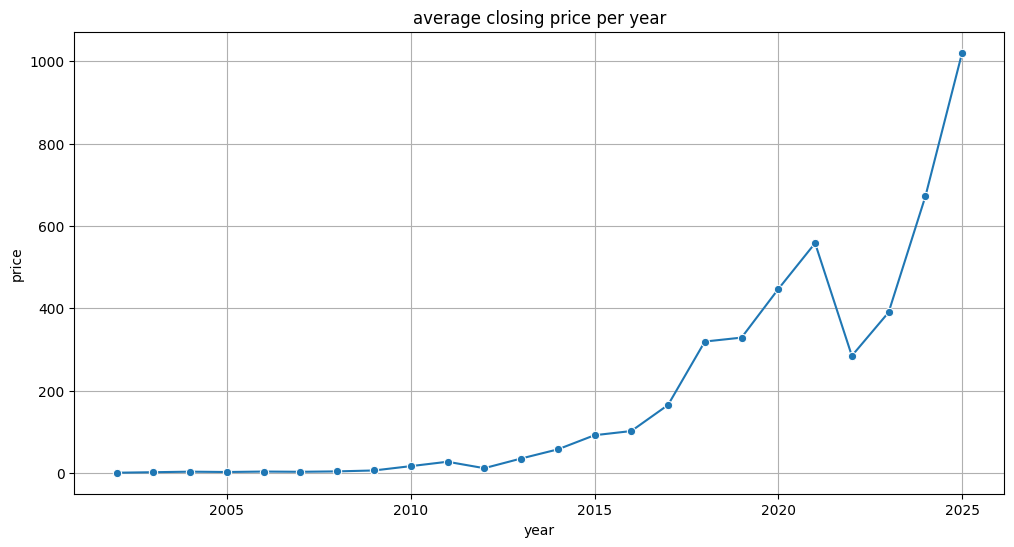

In [34]:
plt.figure(figsize=(12,6))
sns.lineplot(x='year',y='close',data=average_yearly_close,marker='o')
plt.title('average closing price per year')
plt.xlabel('year')
plt.ylabel('price')
plt.grid(True)
plt.show()

MONTHLY PLOT

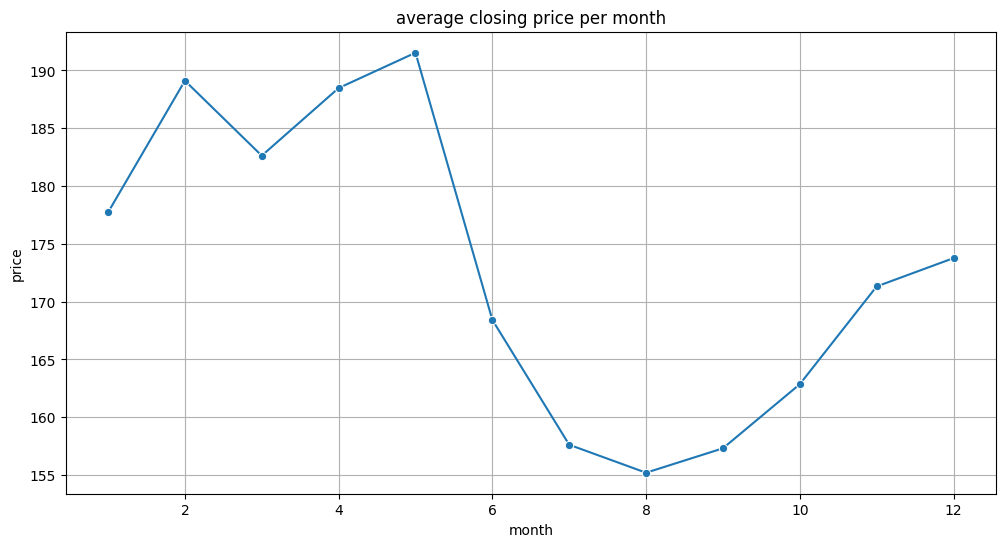

In [35]:
plt.figure(figsize=(12,6))
sns.lineplot(x='month',y='close',data= average_monthly_close,marker='o')
plt.title('average closing price per month')
plt.xlabel('month')
plt.ylabel('price')
plt.grid(True)
plt.show()

Visualize Volume Traded 🔁

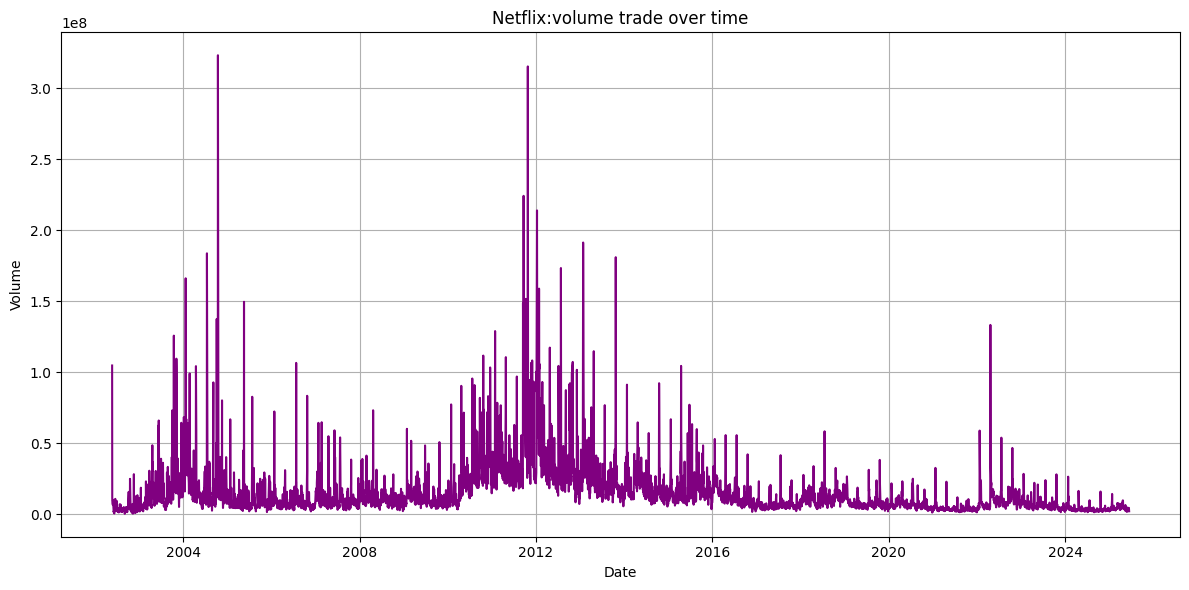

In [36]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df,x='date',y='volume',color='purple')
plt.title('Netflix:volume trade over time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.tight_layout()
plt.grid(True)
plt.show()

 Monthly average volume for smoother insights

plt.xticks(...)	This sets the tick positions and labels on the x-axis.
ticks=range(0, len(avg_monthly_volume), 6)	This tells Matplotlib to only place a tick every 6 months. range(...) generates positions like 0, 6, 12, etc., based on the index.
labels=avg_monthly_volume['year_month'][::6]	These are the actual labels for the ticks. ::6 means take every 6th value from the 'year_month' column.
rotation=45	This rotates the labels by 45 degrees to make them readable and prevent overlapping.

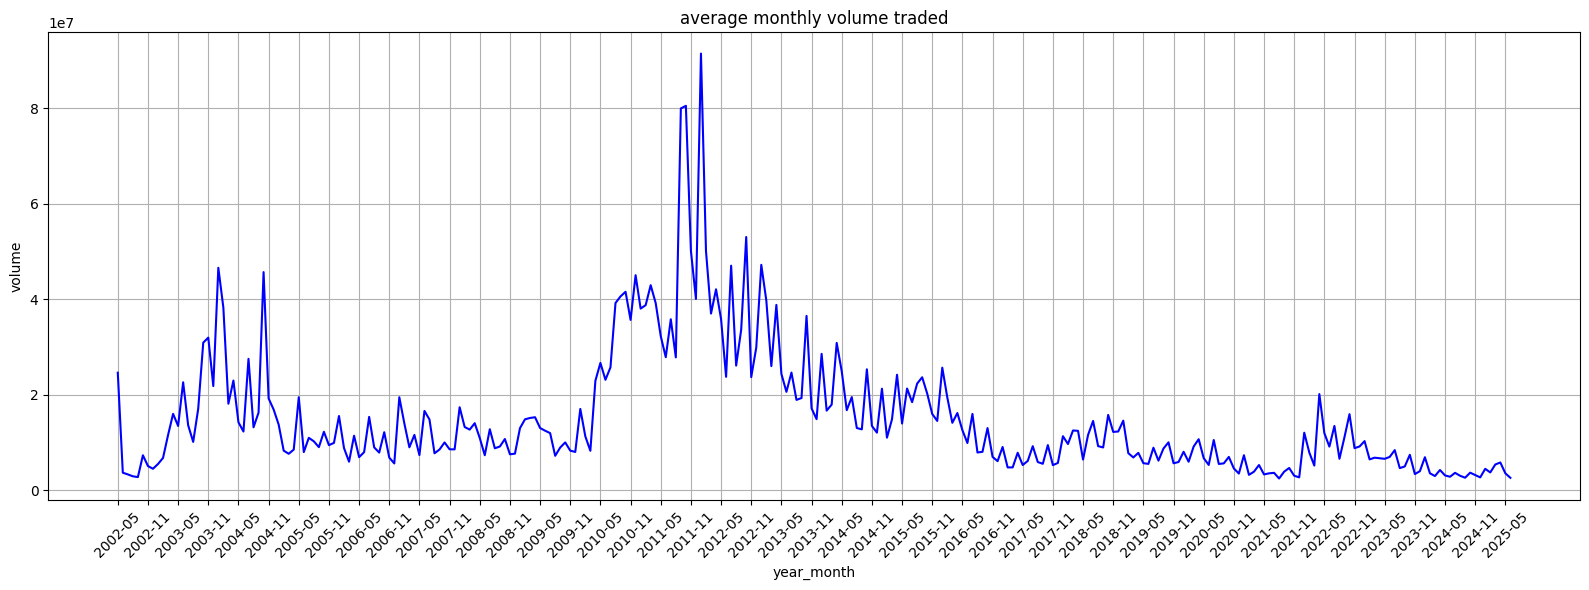

In [42]:
df['year_month']=df['date'].dt.to_period('M')
avg_monthly_volume=df.groupby('year_month')['volume'].mean().reset_index()
avg_monthly_volume['year_month']=avg_monthly_volume['year_month'].astype(str)
plt.figure(figsize=(16,6))
sns.lineplot(x='year_month',y='volume',data=avg_monthly_volume,color='blue')
plt.xticks(ticks=range(0, len(avg_monthly_volume), 6),
           labels=avg_monthly_volume['year_month'][::6],
           rotation=45)
plt.title('average monthly volume traded')
plt.xlabel('year_month')
plt.ylabel('volume')
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>